## Checking system 

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)


1.3.0


In [3]:
sess = tf.Session()

In [4]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/cpu:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11879753154240322815]

## Load MNIST Data

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Implementing Regression

In [127]:
x = tf.placeholder(tf.float32, [None, 784])


In [128]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [102]:
y = tf.nn.softmax(tf.matmul(x, W) + b) #Implementing the model

## Training the model 

In [103]:
y_ = tf.placeholder(tf.float32, [None, 10]) #Placeholder for correct anwsers

In [104]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [105]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [106]:
sess = tf.InteractiveSession()

In [107]:
tf.global_variables_initializer().run()

In [108]:
for _ in range(1000): # Training using Stochastic Gradient Descent (Small batches of "random" data)
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

## Evaluating the model

In [109]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [110]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [111]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9206


## K-means Clustering
#### (with Sklearn)

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()# Generate Data
import numpy as np

In [65]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=2,
                       cluster_std=0.60, random_state=0)
#X = X[:, ::-1] # flip axes for better plotting

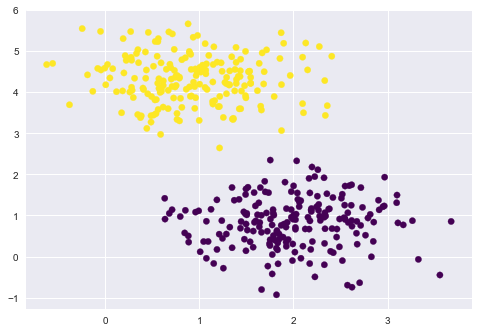

In [67]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(2, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [68]:
#model = KMeansClustering(num_clusters = 1000)

## GMM

In [28]:
import numpy as np
import tensorflow as tf

from tensorflow.contrib.factorization.python.ops.gmm import GMM

In [29]:
#Creates a model for running GMM training and inference
x = GMM(
    num_clusters = 1,
    model_dir="/Users/oliver/Dropbox/EDU/DTU/Bachelorprojekt Blockchain/Blockchain-Transaction-Classification/GMM",
    random_seed=0,
    params='wmc',
    initial_clusters='random',
    covariance_type='full',
    config=None
) 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1290fcf98>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/Users/oliver/Dropbox/EDU/DTU/Bachelorprojekt Blockchain/Blockchain-Transaction-Classification/GMM'}


In [1]:
#GMM.fit(X)

In [31]:
#gmm_model = tf.contrib.factorization.GMM(initial_clusters='random', num_clusters=100, random_seed=666)

#gmm_model.fit(input_fn=loader.next_batch)

In [19]:
import tensorflow as tf
class GMMDataLoader:
    def __init__(self, points, batch_size):
        self.points = points
        self.batch_size = batch_size
        num_points = points.shape[0]
        self.num_points = num_points
        dim = points.shape[1]
        self.count = 0
        #self.x = tf.constant(self.points)
        print ('Loaded in a total of %d points, the dimension is %d'%(num_points, dim))


    def next_batch(self, batch_size=128):
        self.count += 1
        count = self.count + 1
        print ('batch [%d]'%count) 
        num_points = self.num_points
        x = tf.constant(self.points)
        indices = tf.random_uniform(tf.constant([batch_size]),
                                          minval=0, maxval=num_points-1,
                                          dtype=tf.int32,
                                          seed=10)
        return tf.gather(x, indices), None


import numpy as np
x = np.random.random((10, 2)).astype('float32')

loader = GMMDataLoader(x, 128)

Loaded in a total of 10 points, the dimension is 2


In [ ]:
gmm_model = tf.contrib.factorization.GMM(initial_clusters='random', num_clusters=100, random_seed=666)

gmm_model.fit(input_fn=loader.next_batch)

In [34]:
loader.next_batch(10)

batch [7]


(<tf.Tensor 'Gather_12:0' shape=(10, 2) dtype=float32>, None)

In [17]:
import numpy as np
x = np.random.random((10, 10)).astype('float32')

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [22]:
# Generate Data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=40, centers=2,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

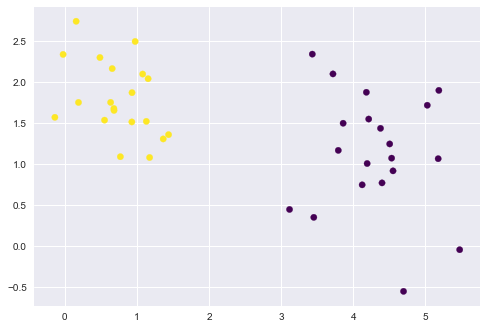

In [ ]:
!tensorboard --logdir=/tmp/MNIST_data

TensorBoard 0.1.5 at http://Olivers-MBP-4:6006 (Press CTRL+C to quit) 

In [30]:
tf.constant(np.random.random((10, 2)).astype('float32'))

<tf.Tensor 'Const_18:0' shape=(10, 2) dtype=float32>